<a href="https://colab.research.google.com/github/M0n1ka-05/Rossmann_Sale_Prediction/blob/main/Monika_Shinde_Team_4_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### **What is Sale Forecasting(prediction)?**

Sales forecasting is the process of estimating future sales. Accurate sales forecasts enable companies to make informed business decisions and predict short-term and long-term performance. Companies can base their forecasts on past sales data, industry-wide comparisons, and economic trends.

It is easier for established companies to predict future sales based on years of past business data.Sales forecasting gives insight into how a company should manage its workforce, cash flow, and resources. In addition to helping a company allocate its internal resources effectively, predictive sales data is important for businesses when looking to acquire investment capital.

Sales forecasting allows companies to:

*   Predict achievable sales revenue;
*   Efficiently allocate resources;
*   Plan for future growth.




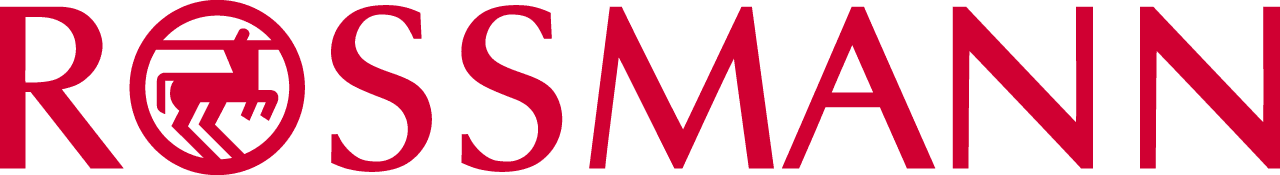

So, lets get started. Our major task as part of this project is to predict sales, for **Rossmann**. 

In this project we will analyse how various affect the sales for various stores.

Few points which we try to elaborate, in our project further:


1.   We have null values which need to handled.
2.   Dataset is too big, sampling is required.
3.   There are few stored where sales is 0, even though stores are open, so need to check what is reason for that, and how to bring business there, if any changes required, or we can ignore it.
4.   We have columns for Promo2 , most of stores having null value there, so need to check if promo 2 affecting sales , and how much it is affecting.

Few points based on initial analysis:


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file1 = ('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/dat/Rossmann Stores Data.csv')
file2 = ('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/dat/store.csv')

In [4]:
sales_df = pd.read_csv(file1)
store_df = pd.read_csv(file2)

Let's see how our data looks like, and what all features we are having.



In [5]:
sales_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [6]:
store_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


Look's cool. Now lets check how many values are null. 

Null or missing values, can have huge impact on our model. So it's important to handle them before hand.

In [7]:
sales_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Sales dataframe looks perfect, but store dataframe is having missing values.

In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


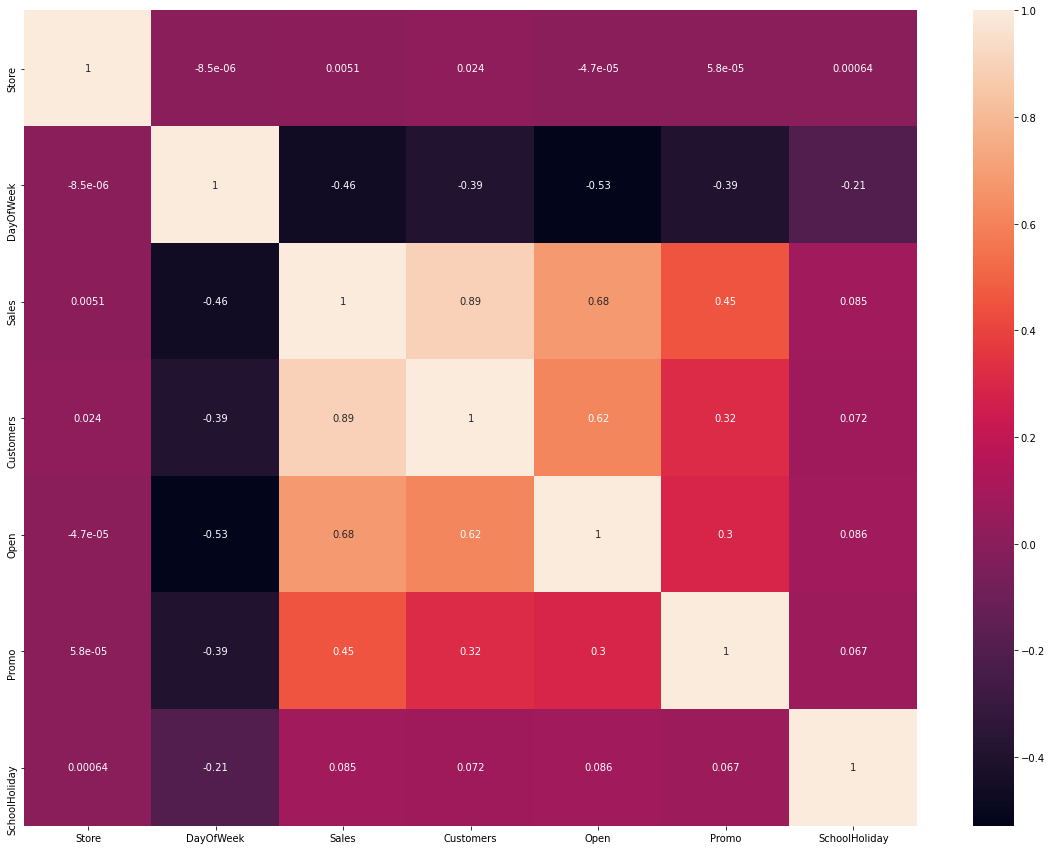

In [11]:
plt.subplots(figsize=(20,15))
sns.heatmap(sales_df.corr(), annot = True)

In [12]:
sales_df['Customers'].value_counts()

0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4328         1
4894         1
4160         1
3972         1
3485         1
Name: Customers, Length: 4086, dtype: int64

In [13]:
sales_df[(sales_df['Customers'] == 0) & (sales_df['Open'] == 1)].value_counts()

Store  DayOfWeek  Date        Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday
1100   3          2014-04-30  0      0          1     1      0             0                1
1039   3          2013-07-10  0      0          1     0      0             0                1
589    1          2013-04-29  0      0          1     1      0             0                1
548    5          2014-09-05  0      0          1     1      0             1                1
391    3          2013-08-28  0      0          1     1      0             1                1
387    4          2014-07-24  0      0          1     0      0             1                1
364    3          2013-05-08  0      0          1     0      0             0                1
       2          2013-05-07  0      0          1     0      0             0                1
357    1          2014-09-22  0      0          1     0      0             0                1
353    6          2013-03-16  0      0          1     0      0   